In [2]:
# Libraries 

import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint

import sys

from random import random

import OpenGL
from OpenGL.GL import *
from OpenGL.GLU import *
import OpenGL.GL as gl
import OpenGL.GLU as glu
import OpenGL.GLUT as glut

import csv
import pywavefront
import pygame
from pygame.locals import *

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


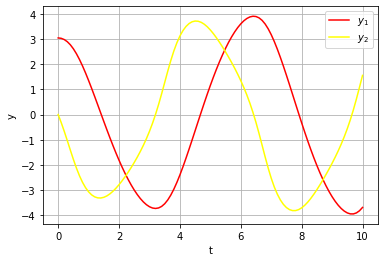

In [14]:
# ODE Solving Example
def sys_of_funcs(y, t, b, c):
    y1 = y[0]
    y2 = y[1]
    f1 = y2
    f2 = - b * y1 - c * np.sin(y2) 
    return [f1, f2]

init = np.pi - 0.1, 0.0 
t = np.linspace(0, 10, 101)
b = 1
c = -1
sol = odeint(sys_of_funcs, init, t, args=(b, c))

plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t, sol[:, 0], color='red', label=r"$y_1$")
plt.plot(t, sol[:, 1], color='yellow', label=r"$y_2$")
plt.legend(loc="best")
plt.show()

In [ ]:
#OpenGL Example

pointdata = [[0, 0.5, 0], 
             [-0.5, -0.5, 0], 
             [0.5, -0.5, 0]]

pointcolor = [[1, 1, 0], 
              [0, 1, 1], 
              [1, 0, 1]]

vertex_source = """
varying vec4 vertex_color;
void main(){
    gl_Position = gl_ModelViewProjectionMatrix * gl_Vertex;
    vertex_color = gl_Color;
}
"""

fragment_source = """
varying vec4 vertex_color;
void main() {
    gl_FragColor = vertex_color;
}
"""

def create_shader(sh_type, sh_source):
    sh = gl.glCreateShader(sh_type)
    gl.glShaderSource(sh, sh_source)
    gl.glCompileShader(sh)
    return sh

def display():
    gl.glClear(gl.GL_COLOR_BUFFER_BIT)
    gl.glEnableClientState(gl.GL_VERTEX_ARRAY)
    gl.glEnableClientState(gl.GL_COLOR_ARRAY)
    gl.glVertexPointer(3, gl.GL_FLOAT, 0, pointdata)
    gl.glColorPointer(3, gl.GL_FLOAT, 0, pointcolor)
    gl.glDrawArrays(gl.GL_TRIANGLES, 0, 3)
    gl.glDisableClientState(gl.GL_VERTEX_ARRAY)
    gl.glDisableClientState(gl.GL_COLOR_ARRAY)
    glut.glutSwapBuffers()
    
def specialkeys(key, x, y):
    global pointcolor
    if key == glut.GLUT_KEY_UP:
        gl.glRotatef(5, 1, 0, 0)
    if key == glut.GLUT_KEY_DOWN:
        gl.glRotatef(-5, 1, 0, 0)
    if key == glut.GLUT_KEY_LEFT:
        gl.glRotatef(5, 0, 1, 0)
    if key == glut.GLUT_KEY_RIGHT:
        gl.glRotatef(-5, 0, 1, 0)
    if key == glut.GLUT_KEY_END:
        pointcolor = [[random(), random(), random()], 
                      [random(), random(), random()], 
                      [random(), random(), random()]]

def initialize():
    vertex = create_shader(gl.GL_VERTEX_SHADER, vertex_source)
    fragment = create_shader(gl.GL_FRAGMENT_SHADER, fragment_source)
    
    program = gl.glCreateProgram()
    gl.glAttachShader(program, vertex)
    gl.glAttachShader(program, fragment)
    gl.glLinkProgram(program)
    gl.glUseProgram(program)


def run():
    glut.glutInit(sys.argv)
    glut.glutInitDisplayMode(glut.GLUT_DOUBLE | glut.GLUT_RGB)
    glut.glutInitWindowSize(640, 480)
    glut.glutInitWindowPosition(50, 50)
    window = glut.glutCreateWindow("Example")
    glut.glutDisplayFunc(display)
    glut.glutIdleFunc(display)
    glut.glutSpecialFunc(specialkeys)
    gl.glClearColor(0.2, 0.2, 0.2, 1)
    
    try:
        initialize()
    except:
        print("Error")
        
    glut.glutMainLoop()
    
print("Press `End` to change color")

run()

Press `End` to change color


In [ ]:
#.csv File Opening, Reading and Writing to Array

with open('coefficients.csv', newline='') as f:
    line_array = []
    reader = csv.reader(f)
    for row in reader:
        line=[x for x in ';'.join(row).split(';')]
        line_array.append(line)

In [3]:
# Model Import Example
# https://github.com/pywavefront/PyWavefront/issues/87#issuecomment-464348971
# https://inareous.github.io/posts/opening-obj-using-py

scene = pywavefront.Wavefront('model3.obj', collect_faces=True)

scene_box = (scene.vertices[0], scene.vertices[0])
for vertex in scene.vertices:
    min_v = [min(scene_box[0][i], vertex[i]) for i in range(3)]
    max_v = [max(scene_box[1][i], vertex[i]) for i in range(3)]
    scene_box = (min_v, max_v)

scene_size     = [scene_box[1][i]-scene_box[0][i] for i in range(3)]
max_scene_size = max(scene_size)
scaled_size    = 5
scene_scale    = [scaled_size/max_scene_size for i in range(3)]
scene_trans    = [-(scene_box[1][i]+scene_box[0][i])/2 for i in range(3)]

def Model():
    glPushMatrix()
    glScalef(*scene_scale)
    glTranslatef(*scene_trans)

    for mesh in scene.mesh_list:
        glBegin(GL_TRIANGLES)
        for face in mesh.faces:
            for vertex_i in face:
                glColor4f(0.729, 0.333, 0.827, 0.35)
                glVertex3f(*scene.vertices[vertex_i])
        glEnd()

    glPopMatrix()

def main():
        pygame.init()
        display = (800, 600)
        pygame.display.set_mode(display, DOUBLEBUF | OPENGL)
        gluPerspective(45, (display[0] / display[1]), 1, 500.0)
        glTranslatef(0.0, 0.0, -10)

        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_LEFT:
                        glTranslatef(-0.5,0,0)
                    if event.key == pygame.K_RIGHT:
                        glTranslatef(0.5,0,0)
                    if event.key == pygame.K_UP:
                        glTranslatef(0,1,0)
                    if event.key == pygame.K_DOWN:
                        glTranslatef(0,-1,0)

            glRotatef(1, 5, 1, 1)
            glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)

            glPolygonMode(GL_FRONT_AND_BACK, GL_LINE)
            Model()
            glPolygonMode(GL_FRONT_AND_BACK, GL_FILL)

            pygame.display.flip()
            pygame.time.wait(10)

main()

Unimplemented OBJ format statement 'g' on line 'g Part1'
Unimplemented OBJ format statement 'g' on line 'g Part2'
Unimplemented OBJ format statement 'g' on line 'g Part3'
Unimplemented OBJ format statement 'g' on line 'g Part4'
Unimplemented OBJ format statement 'g' on line 'g Part5'
Unimplemented OBJ format statement 'g' on line 'g Part8'
Unimplemented OBJ format statement 'g' on line 'g Part6'
Unimplemented OBJ format statement 'g' on line 'g Part6'
Unimplemented OBJ format statement 'g' on line 'g Part9'


GLError: GLError(
	err = 1282,
	description = b'\xed\xe5\xe4\xee\xef\xf3\xf1\xf2\xe8\xec\xe0\xff \xee\xef\xe5\xf0\xe0\xf6\xe8\xff',
	baseOperation = glRotatef,
	cArguments = (1, 5, 1, 1)
)

In [8]:
# Model File Reading Example

with open('model3.obj','rb') as infile:
    data = infile.read()

In [12]:
# Task ODE System (in progress...)

c_zero = 5.67

#k_ij = lyambda_ij * S_ij

element_surface_area #S_i 

heat_flow #Q_i^R

right_function=np.empty(9)

right_function[0]=(-k[0][1]*(T1-T0)-eps[0]*element_surface_area[0]*c_zero*((T0/100)**4)+heat_flow[0])/c[0]
right_function[1]=(-k[0][1]*(T1-T0)-k[1][2]*(T2-T1)-eps[1]*element_surface_area[1]*c_zero*((T1/100)**4)+heat_flow[1])/c[1]
right_function[2]=(-k[1][2]*(T2-T1)-k[2][3]*(T3-T2)-eps[2]*element_surface_area[2]*c_zero*((T2/100)**4)+heat_flow[2])/c[2]
right_function[3]=(-k[2][3]*(T3-T2)-k[3][4]*(T4-T3)-eps[3]*element_surface_area[3]*c_zero*((T3/100)**4)+heat_flow[3])/c[3]
right_function[4]=(-k[3][4]*(T4-T3)-k[4][5]*(T5-T4)-eps[4]*element_surface_area[4]*c_zero*((T4/100)**4)+heat_flow[4])/c[4]
right_function[5]=(-k[4][5]*(T5-T4)-k[5][6]*(T6-T5)-eps[5]*element_surface_area[5]*c_zero*((T5/100)**4)+heat_flow[5])/c[5]
right_function[6]=(-k[5][6]*(T6-T5)-k[6][7]*(T7-T6)-eps[6]*element_surface_area[6]*c_zero*((T6/100)**4)+heat_flow[6])/c[6]
right_function[7]=(-k[6][7]*(T7-T6)-k[7][8]*(T8-T7)-eps[7]*element_surface_area[7]*c_zero*((T7/100)**4)+heat_flow[7])/c[7]
right_function[8]=(-k[7][8]*(T8-T7)-eps[8]*element_surface_area[8]*c_zero*((T8/100)**4)+heat_flow[8])/c[8]

NameError: name 'element_surface_area' is not defined